In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, LocallyConnected2D
from keras import backend as K
from keras import optimizers

/home/grzegorz/miniconda3/envs/gk_py/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


7291
256
256
8.0
(7291, 16, 16)
0.0
(7291, 16, 16)
0.0
(7291, 16, 16)
3.0
(7291, 16, 16)
x_train shape: (7291, 16, 16, 1)
7291 train samples
2007 test samples


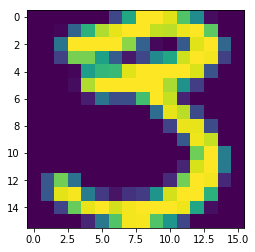

In [2]:
test_txt = 'data/zip_test.txt'
train_txt = 'data/zip_train.txt'
# train_raw = np.loadtxt(train_txt, delimiter=',', usecols=(0, 2), unpack=True)
train_raw = np.loadtxt(train_txt)
test_raw = np.loadtxt(test_txt)

train_lab = train_raw[:, 0]
train_raw = train_raw[:, 1:]

test_lab = test_raw[:, 0]
test_raw = test_raw[:, 1:]

print(train_lab.size)
print(train_raw[0].size)
print(len(train_raw[4]))

# Cleaning the data
train_mat = list()
for ith in train_raw:
    image = np.resize(ith,(16,16))
    train_mat.append(image)
train_mat = np.array(train_mat)

test_mat = list()
for ith in test_raw:
    image = np.resize(ith,(16,16))
    test_mat.append(image)
test_mat = np.array(test_mat)

idn = 100
print(train_lab[idn])
mgplot = plt.imshow(train_mat[idn])
img_ex = '/home/grzegorz/Dropbox/Reinforced_neuron_networks/project_1/im_eg_1.jpg'
plt.savefig(img_ex)
print(train_mat.shape)

idn = 101
print(train_lab[idn])
mgplot = plt.imshow(train_mat[idn])
img_ex = '/home/grzegorz/Dropbox/Reinforced_neuron_networks/project_1/im_eg_2.jpg'
plt.savefig(img_ex)
print(train_mat.shape)

idn = 102
print(train_lab[idn])
mgplot = plt.imshow(train_mat[idn])
img_ex = '/home/grzegorz/Dropbox/Reinforced_neuron_networks/project_1/im_eg_3.jpg'
plt.savefig(img_ex)
print(train_mat.shape)

idn = 103
print(train_lab[idn])
mgplot = plt.imshow(train_mat[idn])
img_ex = '/home/grzegorz/Dropbox/Reinforced_neuron_networks/project_1/im_eg_4.jpg'
plt.savefig(img_ex)
print(train_mat.shape)

batch_size = 128
num_classes = 10
epochs = 6

# input image dimensions
img_rows, img_cols = 16, 16

# the data, split between train and test sets
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = train_mat.reshape(train_mat.shape[0], img_rows, img_cols, 1)
x_test = test_mat.reshape(test_mat.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(train_lab.astype('int'), num_classes)
y_test = keras.utils.to_categorical(test_lab.astype('int'), num_classes)

Train on 7291 samples, validate on 2007 samples
Epoch 1/6
7291/7291 [==============================] - 13s 2ms/step - loss: 1.4936 - acc: 0.6589 - val_loss: 0.8650 - val_acc: 0.8231
Epoch 2/6
7291/7291 [==============================] - 10s 1ms/step - loss: 0.5191 - acc: 0.9119 - val_loss: 0.4659 - val_acc: 0.8954
Epoch 3/6
7291/7291 [==============================] - 10s 1ms/step - loss: 0.3038 - acc: 0.9429 - val_loss: 0.3899 - val_acc: 0.9053
Epoch 4/6
7291/7291 [==============================] - 10s 1ms/step - loss: 0.2228 - acc: 0.9595 - val_loss: 0.3562 - val_acc: 0.9063
Epoch 5/6
7291/7291 [==============================] - 10s 1ms/step - loss: 0.1801 - acc: 0.9664 - val_loss: 0.3084 - val_acc: 0.9193
Epoch 6/6
7291/7291 [==============================] - 9s 1ms/step - loss: 0.1514 - acc: 0.9712 - val_loss: 0.2920 - val_acc: 0.9263
Test loss: 0.29201333526954404
Test accuracy: 0.9262580967804777


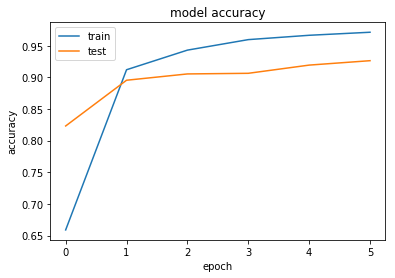

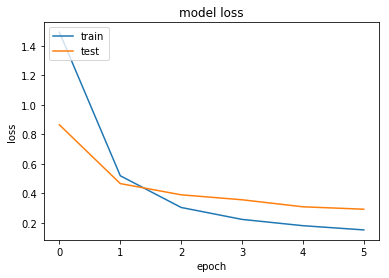

In [33]:
# Task I –Neural Network Design

# (1) Fully connected, where each input/neuron is connected to all the ne
# urons in the next layer

model = Sequential()
model.add(Dense(32, activation='relu',input_shape=input_shape))
model.add(Dense(64, activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
# model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

task_I_1 = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# -------- Figures ---------------
plt.plot(task_I_1.history['acc'])
plt.plot(task_I_1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/home/grzegorz/Dropbox/Reinforced_neuron_networks/project_1/1.jpg')
plt.show()

plt.plot(task_I_1.history['loss'])
plt.plot(task_I_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/home/grzegorz/Dropbox/Reinforced_neuron_networks/project_1/2.jpg')
plt.show()

Train on 7291 samples, validate on 2007 samples
Epoch 1/6
7291/7291 [==============================] - 65s 9ms/step - loss: 2.2904 - acc: 0.1446 - val_loss: 2.2621 - val_acc: 0.1315
Epoch 2/6
7291/7291 [==============================] - 57s 8ms/step - loss: 2.2440 - acc: 0.1724 - val_loss: 2.1959 - val_acc: 0.1789
Epoch 3/6
7291/7291 [==============================] - 52s 7ms/step - loss: 1.7647 - acc: 0.4445 - val_loss: 1.2084 - val_acc: 0.6811
Epoch 4/6
7291/7291 [==============================] - 45s 6ms/step - loss: 0.8596 - acc: 0.7893 - val_loss: 0.7495 - val_acc: 0.7862
Epoch 5/6
7291/7291 [==============================] - 41s 6ms/step - loss: 0.5544 - acc: 0.8495 - val_loss: 0.5924 - val_acc: 0.8226
Epoch 6/6
7291/7291 [==============================] - 40s 6ms/step - loss: 0.4329 - acc: 0.8808 - val_loss: 0.5301 - val_acc: 0.8445
Test loss: 0.5300989364532315
Test accuracy: 0.8445440955760768


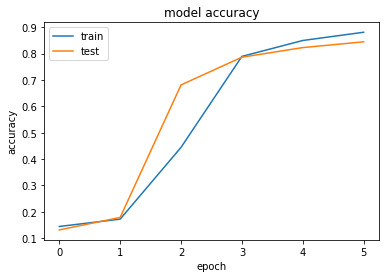

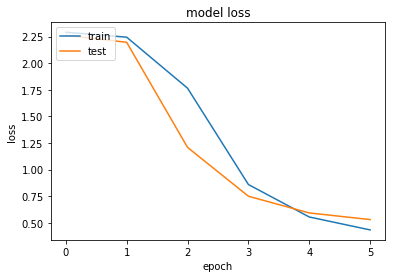

In [34]:
# (2) Locally connected  with  no  weights shared inthe
# first  three  layers,  where  each  input/neuron  is 
# connected to the neurons in a local neighbor in the next layer

model = Sequential()
model.add(LocallyConnected2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(LocallyConnected2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

task_I_2 = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# -------- Figures ---------------
plt.plot(task_I_2.history['acc'])
plt.plot(task_I_2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/home/grzegorz/Dropbox/Reinforced_neuron_networks/project_1/3.jpg')
plt.show()

plt.plot(task_I_2.history['loss'])
plt.plot(task_I_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/home/grzegorz/Dropbox/Reinforced_neuron_networks/project_1/4.jpg')
plt.show()

Train on 7291 samples, validate on 2007 samples
Epoch 1/6
7291/7291 [==============================] - 45651s 6s/step - loss: 2.3403 - acc: 0.1374 - val_loss: 2.3011 - val_acc: 0.1315
Epoch 2/6
7291/7291 [==============================] - 12s 2ms/step - loss: 2.3046 - acc: 0.1605 - val_loss: 2.3007 - val_acc: 0.1530
Epoch 3/6
7291/7291 [==============================] - 12s 2ms/step - loss: 1.9426 - acc: 0.2408 - val_loss: 0.6253 - val_acc: 0.8007
Epoch 4/6
7291/7291 [==============================] - 12s 2ms/step - loss: 0.4338 - acc: 0.8683 - val_loss: 0.5599 - val_acc: 0.8391
Epoch 5/6
7291/7291 [==============================] - 12s 2ms/step - loss: 0.3077 - acc: 0.9087 - val_loss: 0.4988 - val_acc: 0.8685
Epoch 6/6
7291/7291 [==============================] - 14s 2ms/step - loss: 0.2370 - acc: 0.9333 - val_loss: 0.3589 - val_acc: 0.9148
Test loss: 0.3589314022539977
Test accuracy: 0.9147982063968204


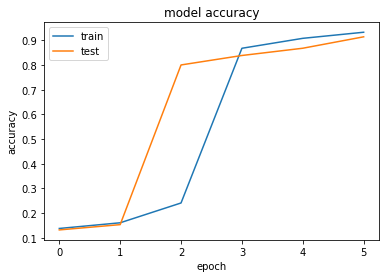

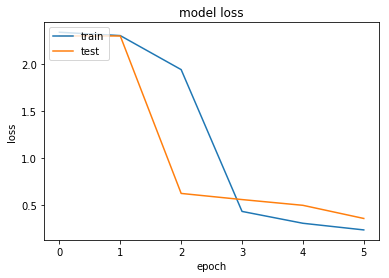

In [35]:
# (3) Locally connected with weights shared in the first three layers
# (i.e., a convolutional neural network
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Dense(64, activation='sigmoid'))
model.add(Flatten())
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
task_I_3 = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# -------- Figures ---------------
plt.plot(task_I_3.history['acc'])
plt.plot(task_I_3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/home/grzegorz/Dropbox/Reinforced_neuron_networks/project_1/5.jpg')
plt.show()

plt.plot(task_I_3.history['loss'])
plt.plot(task_I_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/home/grzegorz/Dropbox/Reinforced_neuron_networks/project_1/6.jpg')
plt.show()

In [36]:
# Task II 
# Techniques for Optimization You need to do the required analysis and 
# then perform experiments for each of the three networks.

# (1) Parameter  initialization  strategies.  For  each  of  the  networks,  analyze
# how  parameters  should  be initialized. Then demonstrate three cases based on your analysis
# 1) learning is very slow; 2) learning is effective (i.e., fast with accurate results)
# ; and 3) the learning is too fast (i.e., the network does not give good performance).
# task_II_1_vs
# kernel_initializer=keras.initializers.Constant(value=50000)

# task_II_1_ef
# kernel_initializer=keras.initializers.Constant(value=0.5)

# task_II_1_tf
# kernel_initializer=keras.initializers.Constant(value=0.5)



model = Sequential()
model.add(Dense(32, activation='relu',input_shape=input_shape, kernel_initializer=keras.initializers.Constant(value=50000)))
model.add(Dense(64, activation='relu',kernel_initializer=keras.initializers.Constant(value=50000)))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
task_II_1_vs = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model = Sequential()
model.add(Dense(32,activation='relu',input_shape=input_shape, kernel_initializer=keras.initializers.Constant(value=0.5)))
model.add(Dense(64, activation='relu', kernel_initializer=keras.initializers.Constant(value=0.5)))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
task_II_1_ef = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model = Sequential()
model.add(Dense(32, activation='relu',input_shape=input_shape, kernel_initializer=keras.initializers.Constant(value=0.0)))
model.add(Dense(64, activation='relu', kernel_initializer=keras.initializers.Constant(value=0.0)))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
task_II_1_tf = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# -------- Figures ---------------
plt.plot(task_II_1_vs.history['acc'],'r-')
plt.plot(task_II_1_ef.history['acc'],'b-')
plt.plot(task_II_1_tf.history['acc'],'g-')

plt.plot(task_II_1_vs.history['val_acc'],'r--')
plt.plot(task_II_1_ef.history['val_acc'],'b--')
plt.plot(task_II_1_tf.history['val_acc'],'g--')

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['slow-train', 'effec-train','fast-train','slow-test', 'effec-test','fast-test'], loc='upper left')
plt.savefig('/home/grzegorz/Dropbox/Reinforced_neuron_networks/project_1/7.jpg')
plt.show()

plt.plot(task_II_1_vs.history['loss'],'r-')
plt.plot(task_II_1_ef.history['loss'],'b-')
plt.plot(task_II_1_tf.history['loss'],'g-')

plt.plot(task_II_1_vs.history['val_loss'],'r--')
plt.plot(task_II_1_ef.history['val_loss'],'b--')
plt.plot(task_II_1_tf.history['val_loss'],'g--')
# plt.plot(task_I_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['slow-train', 'effec-train','fast-train','slow-test', 'effec-test','fast-test'], loc='upper left')
plt.savefig('/home/grzegorz/Dropbox/Reinforced_neuron_networks/project_1/8.jpg')
plt.show()

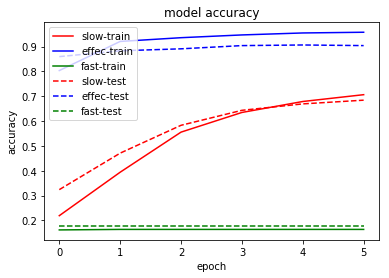

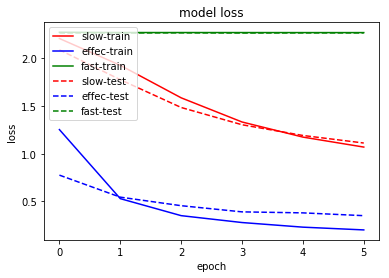

In [48]:
# task_II_2_vs
# kernel_initializer=keras.initializers.Constant(value=50000)

# task_II_2_ef
# kernel_initializer=keras.initializers.Constant(value=0.5)

# task_II_2_tf
# kernel_initializer=keras.initializers.Constant(value=0.5)

model = Sequential()
model.add(LocallyConnected2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape, kernel_initializer=keras.initializers.Constant(value=50000)))
model.add(LocallyConnected2D(64, (3, 3), activation='relu', kernel_initializer=keras.initializers.Constant(value=50000)))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
task_II_2_vs = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model = Sequential()
model.add(LocallyConnected2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape, kernel_initializer=keras.initializers.Constant(value=0.5)))
model.add(LocallyConnected2D(64, (3, 3), activation='relu', kernel_initializer=keras.initializers.Constant(value=0.5)))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
task_II_2_ef = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model = Sequential()
model.add(LocallyConnected2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape, kernel_initializer=keras.initializers.Constant(value=0.0)))
model.add(LocallyConnected2D(64, (3, 3), activation='relu', kernel_initializer=keras.initializers.Constant(value=0.0)))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
task_II_2_tf = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

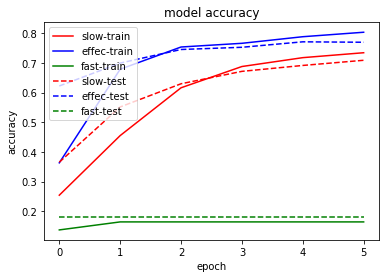

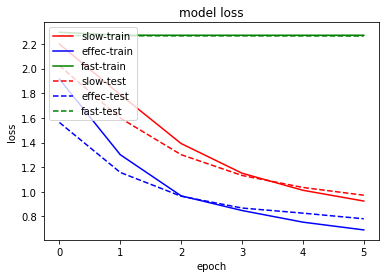

In [49]:
# -------- Figures ---------------
plt.plot(task_II_2_vs.history['acc'],'r-')
plt.plot(task_II_2_ef.history['acc'],'b-')
plt.plot(task_II_2_tf.history['acc'],'g-')

plt.plot(task_II_2_vs.history['val_acc'],'r--')
plt.plot(task_II_2_ef.history['val_acc'],'b--')
plt.plot(task_II_2_tf.history['val_acc'],'g--')
# plt.plot(task_I_3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['slow-train', 'effec-train','fast-train','slow-test', 'effec-test','fast-test'], loc='upper left')
plt.savefig('/home/grzegorz/Dropbox/Reinforced_neuron_networks/project_1/9.jpg')
plt.show()
            
plt.plot(task_II_2_vs.history['loss'],'r-')
plt.plot(task_II_2_ef.history['loss'],'b-')
plt.plot(task_II_2_tf.history['loss'],'g-')

plt.plot(task_II_2_vs.history['val_loss'],'r--')
plt.plot(task_II_2_ef.history['val_loss'],'b--')
plt.plot(task_II_2_tf.history['val_loss'],'g--')
# plt.plot(task_I_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['slow-train', 'effec-train','fast-train','slow-test', 'effec-test','fast-test'], loc='upper left')
plt.savefig('/home/grzegorz/Dropbox/Reinforced_neuron_networks/project_1/10.jpg')
plt.show()

Train on 7291 samples, validate on 2007 samples
Epoch 1/6
7291/7291 [==============================] - 16s 2ms/step - loss: 1.7417 - acc: 0.3901 - val_loss: 1.2797 - val_acc: 0.6368
Epoch 2/6
7291/7291 [==============================] - 10s 1ms/step - loss: 0.9175 - acc: 0.7308 - val_loss: 0.8091 - val_acc: 0.7773
Epoch 3/6
7291/7291 [==============================] - 8s 1ms/step - loss: 0.7211 - acc: 0.8014 - val_loss: 0.9002 - val_acc: 0.7713
Epoch 4/6
7291/7291 [==============================] - 9s 1ms/step - loss: 0.7185 - acc: 0.8066 - val_loss: 0.8947 - val_acc: 0.7454
Epoch 5/6
7291/7291 [==============================] - 11s 1ms/step - loss: 0.6837 - acc: 0.8124 - val_loss: 1.1007 - val_acc: 0.7100
Epoch 6/6
7291/7291 [==============================] - 10s 1ms/step - loss: 0.6587 - acc: 0.8165 - val_loss: 0.9062 - val_acc: 0.7668
Test loss: 0.9061724895794236
Test accuracy: 0.7668161432898692
Train on 7291 samples, validate on 2007 samples
Epoch 1/6
7291/7291 [=================

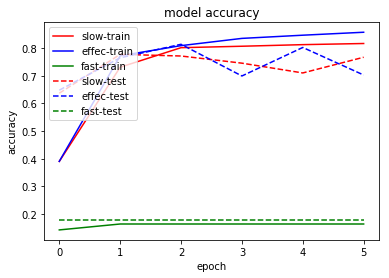

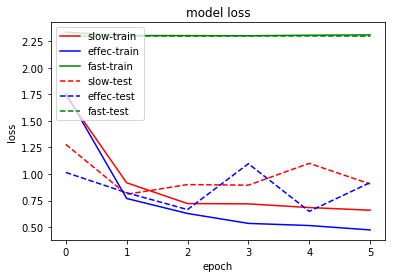

In [50]:
# task_II_1_vs
# kernel_initializer=keras.initializers.Constant(value=50000)

# task_II_2_ef
# kernel_initializer=keras.initializers.Constant(value=0.5)

# task_II_3_tf
# kernel_initializer=keras.initializers.Constant(value=0.5)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=input_shape, kernel_initializer=keras.initializers.Constant(value=50000)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_initializer=keras.initializers.Constant(value=50000)))
model.add(Dense(64, activation='sigmoid'))
model.add(Flatten())
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
task_II_3_vs = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=input_shape, kernel_initializer=keras.initializers.Constant(value=0.5)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_initializer=keras.initializers.Constant(value=0.5)))
model.add(Dense(64, activation='sigmoid'))
model.add(Flatten())
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
task_II_3_ef = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=input_shape, kernel_initializer=keras.initializers.Constant(value=0)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_initializer=keras.initializers.Constant(value=0)))
model.add(Dense(64, activation='sigmoid'))
model.add(Flatten())
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
task_II_3_tf = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# -------- Figures ---------------
plt.plot(task_II_3_vs.history['acc'],'r-')
plt.plot(task_II_3_ef.history['acc'],'b-')
plt.plot(task_II_3_tf.history['acc'],'g-')

plt.plot(task_II_3_vs.history['val_acc'],'r--')
plt.plot(task_II_3_ef.history['val_acc'],'b--')
plt.plot(task_II_3_tf.history['val_acc'],'g--')
# plt.plot(task_I_3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['slow-train', 'effec-train','fast-train','slow-test', 'effec-test','fast-test'], loc='upper left')
plt.savefig('/home/grzegorz/Dropbox/Reinforced_neuron_networks/project_1/11.jpg')
plt.show()

plt.plot(task_II_3_vs.history['loss'],'r-')
plt.plot(task_II_3_ef.history['loss'],'b-')
plt.plot(task_II_3_tf.history['loss'],'g-')

plt.plot(task_II_3_vs.history['val_loss'],'r--')
plt.plot(task_II_3_ef.history['val_loss'],'b--')
plt.plot(task_II_3_tf.history['val_loss'],'g--')
# plt.plot(task_I_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['slow-train', 'effec-train','fast-train','slow-test', 'effec-test','fast-test'], loc='upper left')
plt.savefig('/home/grzegorz/Dropbox/Reinforced_neuron_networks/project_1/12.jpg')
plt.show()

In [63]:
# (2)Learning rate. Estimate a good learning rate for each of the networks. Then demonstrate three cases
# based on your analysis: 1) learning is very slow; 2) learning is effective; and 3) learning is too fast.

# sgd4 = keras.optimizers.SGD(lr=0.7)
# sgd5 = keras.optimizers.SGD(lr=0.0002)
# sgd6 = keras.optimizers.SGD(lr=0.01)
sg_vs = keras.optimizers.SGD(lr=0.00001)
sg_ef = keras.optimizers.SGD(lr=0.05)
sg_tf = keras.optimizers.SGD(lr=100)

In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu',input_shape=input_shape))
model.add(Dense(64, activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(optimizer=sg_vs, loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
net_vs = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 7291 samples, validate on 2007 samples
Epoch 1/6
4224/7291 [================>.............] - ETA: 9s - loss: 2.3123 - acc: 0.0878 

In [64]:
model = Sequential()
model.add(Dense(32,activation='relu',input_shape=input_shape))
model.add(Dense(64, activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(optimizer=sg_ef, loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
net_ef = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 7291 samples, validate on 2007 samples
Epoch 1/6
7291/7291 [==============================] - 17s 2ms/step - loss: 2.2518 - acc: 0.1795 - val_loss: 2.1873 - val_acc: 0.3054
Epoch 2/6
7291/7291 [==============================] - 9s 1ms/step - loss: 2.0436 - acc: 0.3875 - val_loss: 1.8094 - val_acc: 0.6343
Epoch 3/6
7291/7291 [==============================] - 9s 1ms/step - loss: 1.4423 - acc: 0.7867 - val_loss: 1.1507 - val_acc: 0.8062
Epoch 4/6
7291/7291 [==============================] - 9s 1ms/step - loss: 0.8697 - acc: 0.8777 - val_loss: 0.7719 - val_acc: 0.8570
Epoch 5/6
7291/7291 [==============================] - 10s 1ms/step - loss: 0.5880 - acc: 0.9045 - val_loss: 0.5982 - val_acc: 0.8794
Epoch 6/6
7291/7291 [==============================] - 9s 1ms/step - loss: 0.4475 - acc: 0.9202 - val_loss: 0.5116 - val_acc: 0.8844
Test loss: 0.5115819685810766
Test accuracy: 0.8844045841937405


In [58]:
model = Sequential()
model.add(Dense(32, activation='relu',input_shape=input_shape))
model.add(Dense(64, activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(optimizer=sg_tf,loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
net_tf = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 7291 samples, validate on 2007 samples
Epoch 1/6
7291/7291 [==============================] - 20s 3ms/step - loss: 2.3869 - acc: 0.0911 - val_loss: 2.3894 - val_acc: 0.0847
Epoch 2/6
7291/7291 [==============================] - 7s 991us/step - loss: 2.3867 - acc: 0.0911 - val_loss: 2.3892 - val_acc: 0.0847
Epoch 3/6
7291/7291 [==============================] - 8s 1ms/step - loss: 2.3866 - acc: 0.0911 - val_loss: 2.3891 - val_acc: 0.0847
Epoch 4/6
7291/7291 [==============================] - 6s 838us/step - loss: 2.3864 - acc: 0.0911 - val_loss: 2.3889 - val_acc: 0.0847
Epoch 5/6
7291/7291 [==============================] - 6s 764us/step - loss: 2.3863 - acc: 0.0911 - val_loss: 2.3888 - val_acc: 0.0847
Epoch 6/6
7291/7291 [==============================] - 5s 747us/step - loss: 2.3861 - acc: 0.0911 - val_loss: 2.3886 - val_acc: 0.0847
Test loss: 2.388606027874949
Test accuracy: 0.08470353762761657
Train on 7291 samples, validate on 2007 samples
Epoch 1/6
7291/7291 [============

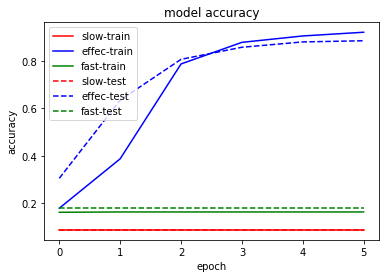

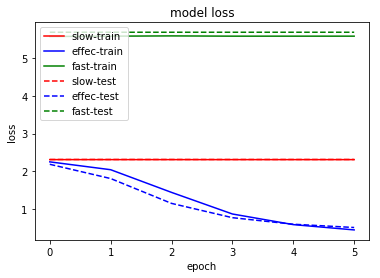

In [65]:
# -------- Figures ---------------
plt.plot(net_vs.history['acc'],'r-')
plt.plot(net_ef.history['acc'],'b-')
plt.plot(net_tf.history['acc'],'g-')

plt.plot(net_vs.history['val_acc'],'r--')
plt.plot(net_ef.history['val_acc'],'b--')
plt.plot(net_tf.history['val_acc'],'g--')
# plt.plot(task_I_3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['slow-train', 'effec-train','fast-train','slow-test', 'effec-test','fast-test'], loc='upper left')
plt.savefig('/home/grzegorz/Dropbox/Reinforced_neuron_networks/project_1/13.jpg')
plt.show()

plt.plot(net_vs.history['loss'],'r-')
plt.plot(net_ef.history['loss'],'b-')
plt.plot(net_tf.history['loss'],'g-')

plt.plot(net_vs.history['val_loss'],'r--')
plt.plot(net_ef.history['val_loss'],'b--')
plt.plot(net_tf.history['val_loss'],'g--')
# plt.plot(task_I_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['slow-train', 'effec-train','fast-train','slow-test', 'effec-test','fast-test'], loc='upper left')
plt.savefig('/home/grzegorz/Dropbox/Reinforced_neuron_networks/project_1/14.jpg')
plt.show()

In [69]:
# sg_vs = keras.optimizers.SGD(lr=0.7)
# sg_ef = keras.optimizers.SGD(lr=0.0002)
# sg_tf = keras.optimizers.SGD(lr=0.01)
sg_vs = keras.optimizers.SGD(lr=0.00001)
sg_ef = keras.optimizers.SGD(lr=5)
sg_tf = keras.optimizers.SGD(lr=100)

In [68]:
model = Sequential()
model.add(LocallyConnected2D(32, kernel_size=(3, 3),activation='relu'))
model.add(LocallyConnected2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=sg_vs,
              metrics=['accuracy'])
task_II_2_vs = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [70]:
model = Sequential()
model.add(LocallyConnected2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(LocallyConnected2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=sg_ef,
              metrics=['accuracy'])
task_II_2_ef = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 7291 samples, validate on 2007 samples
Epoch 1/6
7291/7291 [==============================] - 57s 8ms/step - loss: 2.2701 - acc: 0.1522 - val_loss: 2.1210 - val_acc: 0.2755
Epoch 2/6
7291/7291 [==============================] - 38s 5ms/step - loss: 1.5223 - acc: 0.4588 - val_loss: 0.9844 - val_acc: 0.6826
Epoch 3/6
7291/7291 [==============================] - 45s 6ms/step - loss: 0.6137 - acc: 0.7982 - val_loss: 0.5233 - val_acc: 0.8445
Epoch 4/6
7291/7291 [==============================] - 48s 7ms/step - loss: 0.3009 - acc: 0.9076 - val_loss: 0.4124 - val_acc: 0.8794
Epoch 5/6
7291/7291 [==============================] - 47s 6ms/step - loss: 0.2044 - acc: 0.9386 - val_loss: 0.4738 - val_acc: 0.8675
Epoch 6/6
7291/7291 [==============================] - 52s 7ms/step - loss: 0.1949 - acc: 0.9375 - val_loss: 0.3129 - val_acc: 0.9163
Test loss: 0.31291887721702955
Test accuracy: 0.9162929747077322


In [68]:
model = Sequential()
model.add(LocallyConnected2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(LocallyConnected2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=sg_tf,
              metrics=['accuracy'])
task_II_2_tf = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

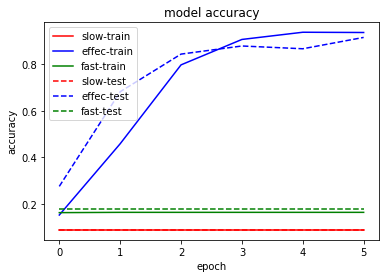

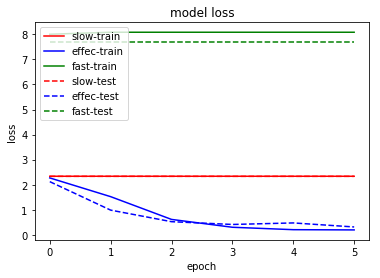

In [71]:
# -------- Figures ---------------
plt.plot(task_II_2_vs.history['acc'],'r-')
plt.plot(task_II_2_ef.history['acc'],'b-')
plt.plot(task_II_2_tf.history['acc'],'g-')

plt.plot(task_II_2_vs.history['val_acc'],'r--')
plt.plot(task_II_2_ef.history['val_acc'],'b--')
plt.plot(task_II_2_tf.history['val_acc'],'g--')
# plt.plot(task_I_3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['slow-train', 'effec-train','fast-train','slow-test', 'effec-test','fast-test'], loc='upper left')
plt.savefig('/home/grzegorz/Dropbox/Reinforced_neuron_networks/project_1/15.jpg')
plt.show()

plt.plot(task_II_2_vs.history['loss'],'r-')
plt.plot(task_II_2_ef.history['loss'],'b-')
plt.plot(task_II_2_tf.history['loss'],'g-')

plt.plot(task_II_2_vs.history['val_loss'],'r--')
plt.plot(task_II_2_ef.history['val_loss'],'b--')
plt.plot(task_II_2_tf.history['val_loss'],'g--')
# plt.plot(task_I_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['slow-train', 'effec-train','fast-train','slow-test', 'effec-test','fast-test'], loc='upper left')
plt.savefig('/home/grzegorz/Dropbox/Reinforced_neuron_networks/project_1/16.jpg')
plt.show()

In [90]:
# sg_vs = keras.optimizers.SGD(lr=0.7)
# sg_ef = keras.optimizers.SGD(lr=0.0002)
# sg_tf = keras.optimizers.SGD(lr=0.01)

sg_vs = keras.optimizers.SGD(lr=0.00001)
sg_ef = keras.optimizers.SGD(lr=25)
sg_tf = keras.optimizers.SGD(lr=100)
batch_size

In [99]:
keras.optimizers.Adadelta(lr=25)

In [72]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Dense(64, activation='sigmoid'))
model.add(Flatten())
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=sg_vs,
              metrics=['accuracy'])
task_II_3_vs = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [102]:
sg_ef = keras.optimizers.SGD(lr=25)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3),activation='sigmoid'))
model.add(Flatten())
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss=keras.losses.categorical_crossentropy,
#                optimizer=sg_ef,
              optimizer=keras.optimizers.Adadelta(lr=0.5),
              metrics=['accuracy'])

task_II_3_ef = model.fit(x_train, y_train, batch_size=None, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 7291 samples, validate on 2007 samples
Epoch 1/6
7291/7291 [==============================] - 38s 5ms/step - loss: 1.1911 - acc: 0.5785 - val_loss: 0.4235 - val_acc: 0.8754
Epoch 2/6
7291/7291 [==============================] - 27s 4ms/step - loss: 0.2217 - acc: 0.9354 - val_loss: 0.3196 - val_acc: 0.9148
Epoch 3/6
7291/7291 [==============================] - 27s 4ms/step - loss: 0.1345 - acc: 0.9617 - val_loss: 0.2690 - val_acc: 0.9332
Epoch 4/6
7291/7291 [==============================] - 29s 4ms/step - loss: 0.0924 - acc: 0.9742 - val_loss: 0.2309 - val_acc: 0.9417
Epoch 5/6
7291/7291 [==============================] - 29s 4ms/step - loss: 0.0710 - acc: 0.9783 - val_loss: 0.2248 - val_acc: 0.9407
Epoch 6/6
7291/7291 [==============================] - 29s 4ms/step - loss: 0.0528 - acc: 0.9844 - val_loss: 0.2218 - val_acc: 0.9442
Test loss: 0.22176867250147064
Test accuracy: 0.9441953165114193


In [72]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Dense(64, activation='sigmoid'))
model.add(Flatten())
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=sg_tf,
              metrics=['accuracy'])
task_II_3_tf = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

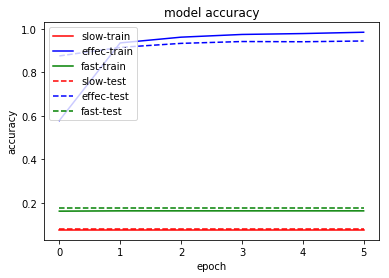

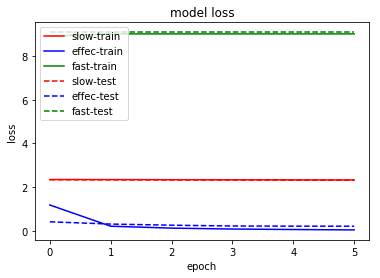

In [103]:
# -------- Figures ---------------
plt.plot(task_II_3_vs.history['acc'],'r-')
plt.plot(task_II_3_ef.history['acc'],'b-')
plt.plot(task_II_3_tf.history['acc'],'g-')

plt.plot(task_II_3_vs.history['val_acc'],'r--')
plt.plot(task_II_3_ef.history['val_acc'],'b--')
plt.plot(task_II_3_tf.history['val_acc'],'g--')
# plt.plot(task_I_3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['slow-train', 'effec-train','fast-train','slow-test', 'effec-test','fast-test'], loc='upper left')
plt.savefig('/home/grzegorz/Dropbox/Reinforced_neuron_networks/project_1/17.jpg')
plt.show()

plt.plot(task_II_3_vs.history['loss'],'r-')
plt.plot(task_II_3_ef.history['loss'],'b-')
plt.plot(task_II_3_tf.history['loss'],'g-')

plt.plot(task_II_3_vs.history['val_loss'],'r--')
plt.plot(task_II_3_ef.history['val_loss'],'b--')
plt.plot(task_II_3_tf.history['val_loss'],'g--')
# plt.plot(task_I_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['slow-train', 'effec-train','fast-train','slow-test', 'effec-test','fast-test'], loc='upper left')
plt.savefig('/home/grzegorz/Dropbox/Reinforced_neuron_networks/project_1/18.jpg')
plt.show()

In [13]:
# (3)Explain  how  the  batch  size  would  impact  the  batch  normalization  for  each  of  the  networks.  Then 
# demonstrate an effective batch size and an ineffective batch size on each of the three networks  you 
# have.
batch_size_ef=int(100)
batch_size_tf=int(400)

model = Sequential()
model.add(Dense(32,activation='relu',input_shape=input_shape))
model.add(Dense(64, activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
task_II_1_ef = model.fit(x_train, y_train, batch_size=batch_size_ef, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model = Sequential()
model.add(Dense(32, activation='relu',input_shape=input_shape))
model.add(Dense(64, activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
task_II_1_tf = model.fit(x_train, y_train, batch_size=batch_size_tf, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 7291 samples, validate on 2007 samples
Epoch 1/6
7291/7291 [==============================] - 14s 2ms/step - loss: 1.2628 - acc: 0.7309 - val_loss: 0.6474 - val_acc: 0.8769
Epoch 2/6
7291/7291 [==============================] - 11s 1ms/step - loss: 0.4081 - acc: 0.9343 - val_loss: 0.4276 - val_acc: 0.9078
Epoch 3/6
7291/7291 [==============================] - 9s 1ms/step - loss: 0.2594 - acc: 0.9519 - val_loss: 0.3579 - val_acc: 0.9198
Epoch 4/6
7291/7291 [==============================] - 7s 926us/step - loss: 0.1945 - acc: 0.9617 - val_loss: 0.3250 - val_acc: 0.9143
Epoch 5/6
7291/7291 [==============================] - 8s 1ms/step - loss: 0.1550 - acc: 0.9706 - val_loss: 0.2961 - val_acc: 0.9183
Epoch 6/6
7291/7291 [==============================] - 9s 1ms/step - loss: 0.1300 - acc: 0.9763 - val_loss: 0.2921 - val_acc: 0.9183
Test loss: 0.2920964643114173
Test accuracy: 0.9182859991222813
Train on 7291 samples, validate on 2007 samples
Epoch 1/6
7291/7291 [=================

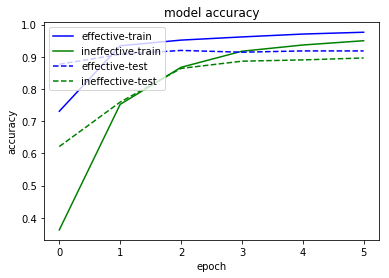

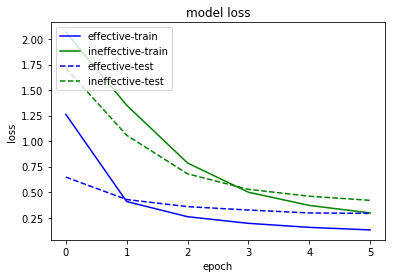

In [14]:
# -------- Figures ---------------

plt.plot(task_II_1_ef.history['acc'],'b-')
plt.plot(task_II_1_tf.history['acc'],'g-')


plt.plot(task_II_1_ef.history['val_acc'],'b--')
plt.plot(task_II_1_tf.history['val_acc'],'g--')
# plt.plot(task_I_3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['effective-train', 'ineffective-train','effective-test', 'ineffective-test'], loc='upper left')
plt.savefig('/home/grzegorz/Dropbox/Reinforced_neuron_networks/project_1/19.jpg')
plt.show()

plt.plot(task_II_1_ef.history['loss'],'b-')
plt.plot(task_II_1_tf.history['loss'],'g-')


plt.plot(task_II_1_ef.history['val_loss'],'b--')
plt.plot(task_II_1_tf.history['val_loss'],'g--')
# plt.plot(task_I_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['effective-train', 'ineffective-train','effective-test', 'ineffective-test'], loc='upper left')
plt.savefig('/home/grzegorz/Dropbox/Reinforced_neuron_networks/project_1/20.jpg')
plt.show()

In [9]:
batch_size_ef=int(100)
batch_size_tf=int(400)

model = Sequential()
model.add(LocallyConnected2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(LocallyConnected2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
task_II_2_ef = model.fit(x_train, y_train, batch_size=batch_size_ef, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model = Sequential()
model.add(LocallyConnected2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(LocallyConnected2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
task_II_2_tf = model.fit(x_train, y_train, batch_size=batch_size_tf, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

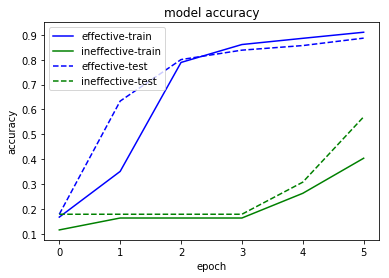

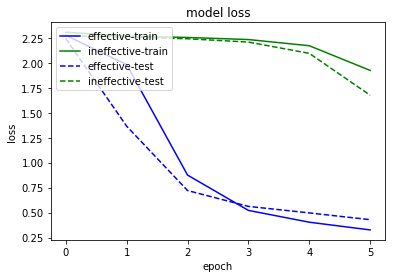

In [12]:
# -------- Figures ---------------
# effective batch size and an ineffective 
plt.plot(task_II_2_ef.history['acc'],'b-')
plt.plot(task_II_2_tf.history['acc'],'g-')

plt.plot(task_II_2_ef.history['val_acc'],'b--')
plt.plot(task_II_2_tf.history['val_acc'],'g--')
# plt.plot(task_I_3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['effective-train', 'ineffective-train','effective-test', 'ineffective-test'], loc='upper left')
plt.savefig('/home/grzegorz/Dropbox/Reinforced_neuron_networks/project_1/21.jpg')
plt.show()

plt.plot(task_II_2_ef.history['loss'],'b-')
plt.plot(task_II_2_tf.history['loss'],'g-')


plt.plot(task_II_2_ef.history['val_loss'],'b--')
plt.plot(task_II_2_tf.history['val_loss'],'g--')
# plt.plot(task_I_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['effective-train', 'ineffective-train','effective-test', 'ineffective-test'], loc='upper left')
plt.savefig('/home/grzegorz/Dropbox/Reinforced_neuron_networks/project_1/22.jpg')
plt.show()

In [8]:
batch_size_ef=int(100)
batch_size_tf=int(400)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Dense(64, activation='sigmoid'))
model.add(Flatten())
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
task_II_3_ef = model.fit(x_train, y_train, batch_size=batch_size_ef, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Dense(64, activation='sigmoid'))
model.add(Flatten())
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
task_II_3_tf = model.fit(x_train, y_train, batch_size=batch_size_tf, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

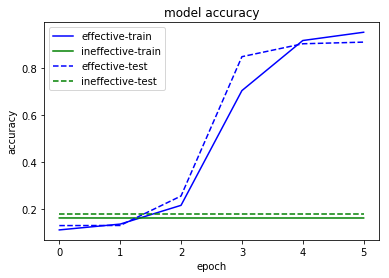

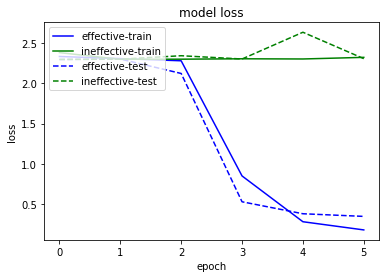

In [11]:
# -------- Figures ---------------

plt.plot(task_II_3_ef.history['acc'],'b-')
plt.plot(task_II_3_tf.history['acc'],'g-')


plt.plot(task_II_3_ef.history['val_acc'],'b--')
plt.plot(task_II_3_tf.history['val_acc'],'g--')
# plt.plot(task_I_3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['effective-train', 'ineffective-train','effective-test', 'ineffective-test'], loc='upper left')
plt.savefig('/home/grzegorz/Dropbox/Reinforced_neuron_networks/project_1/23.jpg')
plt.show()


plt.plot(task_II_3_ef.history['loss'],'b-')
plt.plot(task_II_3_tf.history['loss'],'g-')


plt.plot(task_II_3_ef.history['val_loss'],'b--')
plt.plot(task_II_3_tf.history['val_loss'],'g--')
# plt.plot(task_I_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['effective-train', 'ineffective-train','effective-test', 'ineffective-test'], loc='upper left')
plt.savefig('/home/grzegorz/Dropbox/Reinforced_neuron_networks/project_1/24.jpg')
plt.show()

In [16]:
# (4)Momentum. Commonly  used  momentum coefficient  values  are  0.5,  0.9, and  0.99.
# Using  the  best parameter initialization strategy, the best learning rate, and the best 
# batch size you have foundso far, experiment with the three different momentum values on the three networ
# ks you have and document the results. Explain the differences you have observed on the three neural networks you have.
# sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model = Sequential()
model.add(Dense(32, activation='relu',input_shape=input_shape))
model.add(Dense(64, activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(momentum=0.5),
              metrics=['accuracy'])
task_II_1_vs = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model = Sequential()
model.add(Dense(32,activation='relu',input_shape=input_shape))
model.add(Dense(64, activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(momentum=0.9),
              metrics=['accuracy'])
task_II_1_ef = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model = Sequential()
model.add(Dense(32, activation='relu',input_shape=input_shape))
model.add(Dense(64, activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(momentum=0.99),
              metrics=['accuracy'])
task_II_1_tf = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

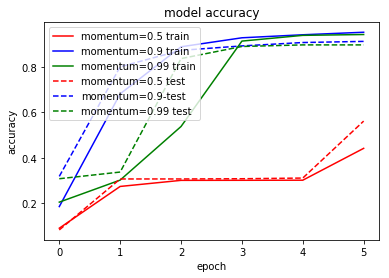

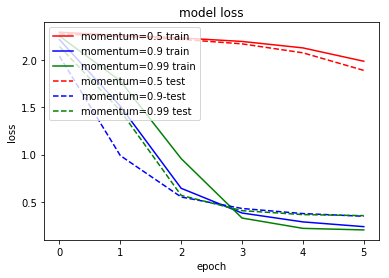

In [20]:
# -------- Figures ---------------
plt.plot(task_II_1_vs.history['acc'],'r-')
plt.plot(task_II_1_ef.history['acc'],'b-')
plt.plot(task_II_1_tf.history['acc'],'g-')

plt.plot(task_II_1_vs.history['val_acc'],'r--')
plt.plot(task_II_1_ef.history['val_acc'],'b--')
plt.plot(task_II_1_tf.history['val_acc'],'g--')
# plt.plot(task_I_3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['momentum=0.5 train', 'momentum=0.9 train','momentum=0.99 train','momentum=0.5 test', 'momentum=0.9-test','momentum=0.99 test'], loc='upper left')
plt.savefig('/home/grzegorz/Dropbox/Reinforced_neuron_networks/project_1/25.jpg')
plt.show()

plt.plot(task_II_1_vs.history['loss'],'r-')
plt.plot(task_II_1_ef.history['loss'],'b-')
plt.plot(task_II_1_tf.history['loss'],'g-')

plt.plot(task_II_1_vs.history['val_loss'],'r--')
plt.plot(task_II_1_ef.history['val_loss'],'b--')
plt.plot(task_II_1_tf.history['val_loss'],'g--')
# plt.plot(task_I_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['momentum=0.5 train', 'momentum=0.9 train','momentum=0.99 train','momentum=0.5 test', 'momentum=0.9-test','momentum=0.99 test'], loc='upper left')
plt.savefig('/home/grzegorz/Dropbox/Reinforced_neuron_networks/project_1/26.jpg')
plt.show()

Train on 7291 samples, validate on 2007 samples
Epoch 1/6
7291/7291 [==============================] - 56s 8ms/step - loss: 2.3283 - acc: 0.0894 - val_loss: 2.2958 - val_acc: 0.0997
Epoch 2/6
7291/7291 [==============================] - 51s 7ms/step - loss: 2.2916 - acc: 0.1494 - val_loss: 2.2769 - val_acc: 0.1789
Epoch 3/6
7291/7291 [==============================] - 55s 8ms/step - loss: 2.2783 - acc: 0.1638 - val_loss: 2.2700 - val_acc: 0.1789
Epoch 4/6
7291/7291 [==============================] - 59s 8ms/step - loss: 2.2727 - acc: 0.1638 - val_loss: 2.2670 - val_acc: 0.1789
Epoch 5/6
7291/7291 [==============================] - 45s 6ms/step - loss: 2.2703 - acc: 0.1638 - val_loss: 2.2655 - val_acc: 0.1789
Epoch 6/6
7291/7291 [==============================] - 41s 6ms/step - loss: 2.2692 - acc: 0.1638 - val_loss: 2.2648 - val_acc: 0.1789
Test loss: 2.264838852927527
Test accuracy: 0.17887394112410923
Train on 7291 samples, validate on 2007 samples
Epoch 1/6
7291/7291 [===============

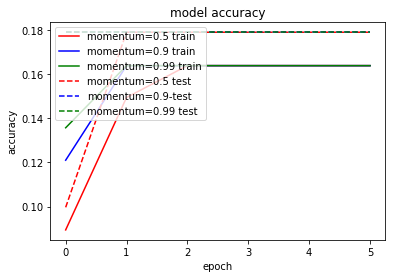

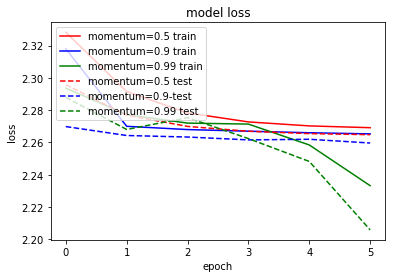

In [18]:
model = Sequential()
model.add(LocallyConnected2D(32, kernel_size=(3, 3),activation='relu'))
model.add(LocallyConnected2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(momentum=0.5),
              metrics=['accuracy'])
task_II_2_vs = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model = Sequential()
model.add(LocallyConnected2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(LocallyConnected2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(momentum=0.9),
              metrics=['accuracy'])
task_II_2_ef = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model = Sequential()
model.add(LocallyConnected2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(LocallyConnected2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(momentum=0.99),
              metrics=['accuracy'])
task_II_2_tf = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# -------- Figures ---------------
plt.plot(task_II_2_vs.history['acc'],'r-')
plt.plot(task_II_2_ef.history['acc'],'b-')
plt.plot(task_II_2_tf.history['acc'],'g-')

plt.plot(task_II_2_vs.history['val_acc'],'r--')
plt.plot(task_II_2_ef.history['val_acc'],'b--')
plt.plot(task_II_2_tf.history['val_acc'],'g--')
# plt.plot(task_I_3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['momentum=0.5 train', 'momentum=0.9 train','momentum=0.99 train','momentum=0.5 test', 'momentum=0.9-test','momentum=0.99 test'], loc='upper left')
plt.savefig('/home/grzegorz/Dropbox/Reinforced_neuron_networks/project_1/27.jpg')
plt.show()

plt.plot(task_II_2_vs.history['loss'],'r-')
plt.plot(task_II_2_ef.history['loss'],'b-')
plt.plot(task_II_2_tf.history['loss'],'g-')

plt.plot(task_II_2_vs.history['val_loss'],'r--')
plt.plot(task_II_2_ef.history['val_loss'],'b--')
plt.plot(task_II_2_tf.history['val_loss'],'g--')
# plt.plot(task_I_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['momentum=0.5 train', 'momentum=0.9 train','momentum=0.99 train','momentum=0.5 test', 'momentum=0.9-test','momentum=0.99 test'], loc='upper left')
plt.savefig('/home/grzegorz/Dropbox/Reinforced_neuron_networks/project_1/28.jpg')
plt.show()

Train on 7291 samples, validate on 2007 samples
Epoch 1/6
7291/7291 [==============================] - 16s 2ms/step - loss: 2.2810 - acc: 0.1629 - val_loss: 2.2673 - val_acc: 0.1789
Epoch 2/6
7291/7291 [==============================] - 11s 2ms/step - loss: 2.2750 - acc: 0.1638 - val_loss: 2.2752 - val_acc: 0.1789
Epoch 3/6
7291/7291 [==============================] - 12s 2ms/step - loss: 2.2663 - acc: 0.1638 - val_loss: 2.2480 - val_acc: 0.1789
Epoch 4/6
7291/7291 [==============================] - 12s 2ms/step - loss: 2.2382 - acc: 0.1638 - val_loss: 2.1989 - val_acc: 0.1789
Epoch 5/6
7291/7291 [==============================] - 12s 2ms/step - loss: 2.0083 - acc: 0.2514 - val_loss: 1.4497 - val_acc: 0.5780
Epoch 6/6
7291/7291 [==============================] - 12s 2ms/step - loss: 0.7983 - acc: 0.7844 - val_loss: 0.6656 - val_acc: 0.7977
Test loss: 0.6655775381964003
Test accuracy: 0.797708021952967
Train on 7291 samples, validate on 2007 samples
Epoch 1/6
7291/7291 [================

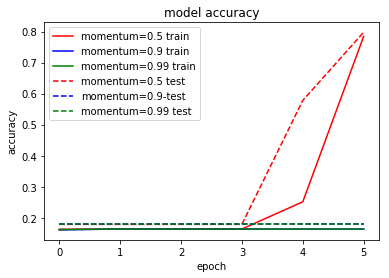

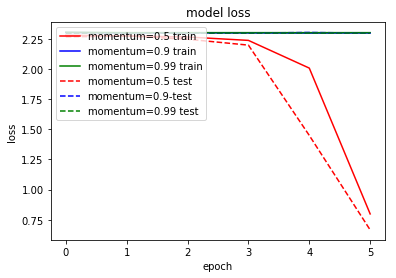

In [19]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Dense(64, activation='sigmoid'))
model.add(Flatten())
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(momentum=0.5),
              metrics=['accuracy'])
task_II_3_vs = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Dense(64, activation='sigmoid'))
model.add(Flatten())
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(momentum=0.9),
              metrics=['accuracy'])
task_II_3_ef = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Dense(64, activation='sigmoid'))
model.add(Flatten())
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(momentum=0.99),
              metrics=['accuracy'])
task_II_3_tf = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# -------- Figures ---------------
plt.plot(task_II_3_vs.history['acc'],'r-')
plt.plot(task_II_3_ef.history['acc'],'b-')
plt.plot(task_II_3_tf.history['acc'],'g-')

plt.plot(task_II_3_vs.history['val_acc'],'r--')
plt.plot(task_II_3_ef.history['val_acc'],'b--')
plt.plot(task_II_3_tf.history['val_acc'],'g--')
# plt.plot(task_I_3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['momentum=0.5 train', 'momentum=0.9 train','momentum=0.99 train','momentum=0.5 test', 'momentum=0.9-test','momentum=0.99 test'], loc='upper left')
plt.savefig('/home/grzegorz/Dropbox/Reinforced_neuron_networks/project_1/29.jpg')
plt.show()

plt.plot(task_II_3_vs.history['loss'],'r-')
plt.plot(task_II_3_ef.history['loss'],'b-')
plt.plot(task_II_3_tf.history['loss'],'g-')

plt.plot(task_II_3_vs.history['val_loss'],'r--')
plt.plot(task_II_3_ef.history['val_loss'],'b--')
plt.plot(task_II_3_tf.history['val_loss'],'g--')
# plt.plot(task_I_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['momentum=0.5 train', 'momentum=0.9 train','momentum=0.99 train','momentum=0.5 test', 'momentum=0.9-test','momentum=0.99 test'], loc='upper left')
plt.savefig('/home/grzegorz/Dropbox/Reinforced_neuron_networks/project_1/30.jpg')
plt.show()

In [ ]:
# Task III -
# Techniques for Improving Generalization For this task, you need to
# do the required analysis and apply the following regularization techniques 
# with the goal to improve the performance on the 2007 samples
# in zip_test.txt.
# (1)Use an ensemble to improve the generalization performance.
# Here you need to use bagging of at least six
# neural networks to improve the performance of the individual 
# neural networks. You need to analyze your results.

In [ ]:
# (2)Dropout. Explain the effects of the dropout
# parameter(probability of keeping a neuron) on the three 
# neural networks you have. Then demonstrate an effective case 
# and an ineffective case on each of the three neural networks you have.

In [ ]:
# (3)L1 regularization. Explain the effects of the L1
# regularization on the three neural networks you have. 
# Then demonstrate an effective L1 regularization case
# and an in effective L1 regularization case on each 
# of the three neural networks you have